<!--  Header einfügen -->
<img style="width:80%;" id="image" src="iu.jpg">

# Einfuerung in Python - IU - WS 2023/24
<img style="width:40%;" id="image" src="python.png">

                                                               andreas.huemmer.ext@iu.org



## Hausaufgabe 04
Erreichbare Punktzahl: 10
Abgabedatum: 22.01.2024, 06:00

Füllen Sie folgende Felder aus:

Name:           Sascha Angermann

Matrikelnummer: 102205656

In [16]:
import os
import math
from time import time
# os.system('cmd command');
import numpy as np
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
import pandas as pd
import random

### Augabe 1 
(2 Punkte)
##### Kryptographie - das RSA System - Schulbuch implementation
Datenverschlüsselung ist eine wichtige Praxis um Daten im Internetz zu schützen. Einer der Hauptalgorithmen ist das RSA Kryptosystem, welches nach seinen Erfindern Rivest, Shamir, and Adleman (RSA) benannt ist.
RSA ist ein sog. Public Key Algorithmus.

    https://www.tutorialspoint.com/cryptography_with_python/cryptography_with_python_understanding_rsa_algorithm.htm
    https://www.scai.fraunhofer.de/content/dam/scai/de/documents/Mediathek/Mathematik%20f%C3%BCr%20die%20Praxis/rsa_skript_und_arbeitsblaetter.pdf
    
Für den RSA Algorithmus benötigen wir zwei Schlüssel, einen privaten (privkey) und einen öffentlichen Schlüssel (pubkey). Nachrichten, die mit einem der Schlüssel verschlüsselt sind können nur mit dem zugehörigen anderen Schlüssel entschlüsselt werden.

ACHTUNG: Wir werden hier eine Schulbuch, Proove of Principle Implementation erstellen. In der Praxis: VERWENDEN SIE BITTE IMMER VORHANDENE UND GETESTETE LIBRARIES!!!!

Wir werden hier nicht auf die Zahlentheoretischen Grundlagen eingehen, sonder uns den Aufgaben pragmatisch widmen.

#### Der RSA Algorithmus
1. Wähle 2 große Primzahlen p und q (für unser Beispiel sollen Primzahlen bis 20 ausreichend sein)
2. Berechne n = p * q
3. Berechne phi = (p-1)(q-1)
4. Wähle einen Wert, so dass 1 < e < phi(n) und gcd( phi(n), e ) = 1 ist.
5. Berechne d, so dass d = e^(-1) mod phi(n)

Der privatekey ist dann: privkey = {e, n}
Der publickey ist dann:  pubkey = {d, n}

Wenn M der plaintext ist, ergibt sich der Ciphertext aus:

    C = M^e mod n

Die Entschlüsselung erfolgt mit:

    M' = C^d mod n

In [17]:
### Ihr code hier ###
# Schrit 1: Wählen sie zwei Primzahlen aus

p = 17
q = 19

print("Die Primzahlen sind: ", p, q)

Die Primzahlen sind:  17 19


In [18]:
### Ihr code hier ###
# Schrit 2: Berechne n

n = p * q

print("n ist: ", n)

n ist:  323


In [19]:
### Ihr code hier ###
# Schrit 3: Berechne phi(n)

phi = (p - 1) * (q - 1)

print("phi ist: ", phi)

phi ist:  288


In [20]:
### Ihr code hier ###
# Schrit 4: Bestimme e

e = random.randrange(2, phi)

while not math.gcd(phi, e) == 1:
    e = random.randrange(2, phi)

print("e ist: ", e)

e ist:  49


In [21]:
# Schritt 5: Berechne d
k = 2
# d = int(( (k*phi)+1 ) / e)
d = pow(e, -1, phi)

print("d =", d, "\n")

print(f'Public key:  {d, n}')
print(f'Private key: {e, n}')

d = 241 

Public key:  (241, 323)
Private key: (49, 323)


In [22]:
M = 67

print("Die Originalnachricht lautet: ", M)

# Verschlüsselung

C = int( (M**e) % n)

print("Die verschlüsselte Nachricht lautet: ", C)

# Entschlüsselung

M1 = int((C**d) % n)

print("Die Entschlüsselung ergibt: ", M1)


Die Originalnachricht lautet:  67
Die verschlüsselte Nachricht lautet:  203
Die Entschlüsselung ergibt:  67


Erreichte Punkte:  ___ / 2

### Aufgabe 2 
(3 Punkte)
##### Kryptographie - Anwendung

Sie haben eine RSA/AES Kryptosystem. Ihr Freund hat ihnen eine mit AES verschlüsselte Bilddatei gesendet. Den AES Key umd die Datei zu entschlüsseln haben Sie ebenfalls erhalten, dieser ist aber mit Ihrem RSA public-Key verschlüsselt.

Alle Dateien die Sie benötigen befinden sich auf Ihrer Festplatte. Führen Sie alle notwendigen Schritte durch um die Datei zu entschlüsseln und geben Sie diese schliesslich auf dem Bildschirm aus.

Der zweite Codeblock mit "no need to run this anymore" ist nur zu Ihrer Illustation um zu zeigen wie die verschlüsselrung erfolgt ist.

In [23]:
# !pip install pycryptodome
from Crypto.Cipher import AES, PKCS1_OAEP
from Crypto.PublicKey import RSA
from Crypto.Random import get_random_bytes
from Crypto.Util.Padding import pad, unpad
import matplotlib.pyplot as plt
from PIL import Image
import io

# AES Encryption and Decryption
def aes_encrypt(data: bytes, key: bytes, block_size: int = 16) -> bytes:
    """Encrypts data using AES."""
    cipher = AES.new(key, AES.MODE_CBC)
    ciphertext = cipher.encrypt(pad(data, block_size))
    return cipher.iv + ciphertext

def aes_decrypt(ciphertext: bytes, key: bytes, block_size: int = 16) -> bytes:
    """Decrypts AES-encrypted data."""
    iv = ciphertext[:block_size]
    cipher = AES.new(key, AES.MODE_CBC, iv)
    decrypted_data = unpad(cipher.decrypt(ciphertext[block_size:]), block_size)
    return decrypted_data

# RSA Encryption and Decryption
def generate_rsa_keypair(key_size: int = 2048) -> (bytes, bytes):
    """Generates an RSA key pair."""
    key = RSA.generate(key_size)
    private_key = key.export_key()
    public_key = key.publickey().export_key()
    return private_key, public_key

def rsa_encrypt(data: bytes, public_key: bytes) -> bytes:
    """Encrypts data using RSA."""
    recipient_key = RSA.import_key(public_key)
    cipher = PKCS1_OAEP.new(recipient_key)
    ciphertext = cipher.encrypt(data)
    return ciphertext

def rsa_decrypt(ciphertext: bytes, private_key: bytes) -> bytes:
    """Decrypts RSA-encrypted data."""
    private_key_obj = RSA.import_key(private_key)
    cipher = PKCS1_OAEP.new(private_key_obj)
    decrypted_data = cipher.decrypt(ciphertext)
    return decrypted_data

# Generate AES key and encrypt it with RSA
def generate_and_encrypt_aes_key(rsa_public_key: bytes) -> (bytes, bytes):
    """Generates an AES key and encrypts it with an RSA public key."""
    aes_key = get_random_bytes(16)  # 16 bytes key for AES-128
    encrypted_aes_key = rsa_encrypt(aes_key, rsa_public_key)
    return aes_key, encrypted_aes_key

# Decrypt AES key with RSA
def decrypt_aes_key(encrypted_aes_key: bytes, rsa_private_key: bytes) -> bytes:
    """Decrypts an AES key using an RSA private key."""
    return rsa_decrypt(encrypted_aes_key, rsa_private_key)

# Save RSA keys and encrypted AES key to files
def save_keys_and_encrypted_aes_key(private_key: bytes, public_key: bytes, encrypted_aes_key: bytes):
    """Saves RSA keys and the encrypted AES key to files."""
    with open("private_key.pem", "wb") as priv_file:
        priv_file.write(private_key)
    with open("public_key.pem", "wb") as pub_file:
        pub_file.write(public_key)
    with open("encrypted_aes_key.bin", "wb") as aes_file:
        aes_file.write(encrypted_aes_key)

# Display an image using matplotlib
def display_image(image_data: bytes, title: str):
    """Displays an image from bytes data."""
    image = Image.open(io.BytesIO(image_data))
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [24]:
## no need to run this any more
#rsa_private_key, rsa_public_key = generate_rsa_keypair()
#aes_key, aes_key_encrypted = generate_and_encrypt_aes_key(rsa_public_key)
#save_keys_and_encrypted_aes_key(rsa_private_key, rsa_public_key, aes_key_encrypted)

#image_path = "nerd.jpg"
#encrypted_image_path = "encrypted_nerd.bin"
#decrypted_image_path = "decrypted_nerd.jpg"

# AES Image Encryption
#with open(image_path, "rb") as img_file:
#    image_data = img_file.read()

#aes_image_ciphertext = aes_encrypt(image_data, aes_key)

#with open(encrypted_image_path, "wb") as enc_file:
#    enc_file.write(aes_image_ciphertext)

#print(f"Image encrypted and saved to {encrypted_image_path}")


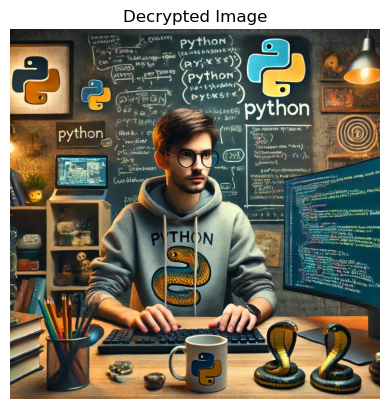

In [25]:

rsa_priv_key_file = 'private_key.pem'
aes_enc_key_file  = 'encrypted_aes_key.bin'
img_enc_file    = 'encrypted_nerd.bin'

### Ihr Code hier ###

def decrypt_img(rsa_priv_key_file: str, aes_enc_key_file: str, img_enc_file: str, eol: str) -> bytes:
    # read rsa private key
    with open(rsa_priv_key_file, 'r') as file:
        rsa_priv_key = file.read()

    # read encrypted aes key
    with open(aes_enc_key_file, 'rb') as file:
        enc_aes_key = file.read()

    # decrypt aes key
    aes_key = decrypt_aes_key(enc_aes_key, rsa_priv_key)

    # read encrypted img
    with open(img_enc_file, 'rb') as file:
        enc_image_data = file.read()

    # decrypt img
    img = aes_decrypt(enc_image_data, aes_key)
    return img


try:
    decrypted_image = decrypt_img(rsa_priv_key_file, aes_enc_key_file, img_enc_file, '\n')
except BaseException as e:
    print(e)


# Display Original and Decrypted Images
#display_image(image_data, "Original Image")
display_image(decrypted_image, "Decrypted Image")


Erreichte Punkte:  ___ / 3

---

### Aufgabe 3 
(3 Punkte)
Spass mit Statisktik

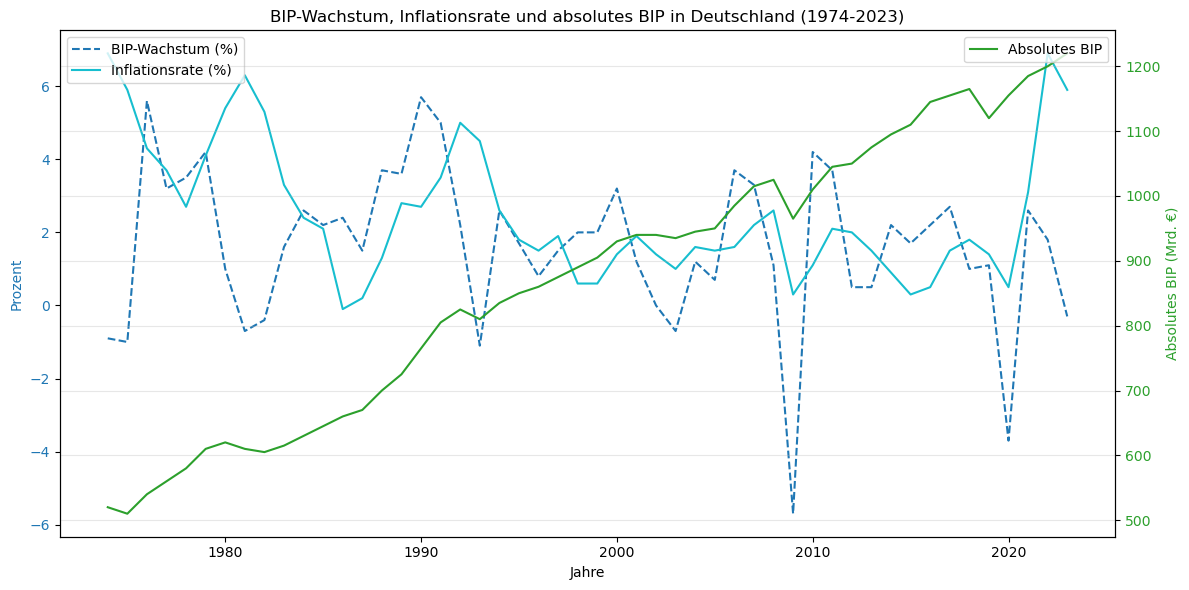

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import sys

%matplotlib inline

# Eingebettete Daten
jahre = np.arange(1974, 2024)
bip_wachstum = [-0.9, -1.0, 5.6, 3.2, 3.5, 4.2, 1.0, -0.7, -0.4, 1.6, 2.6, 2.2, 2.4, 1.5, 3.7, 3.6, 5.7, 5.0, 2.2, -1.1,
                2.6, 1.7, 0.8, 1.5, 2.0, 2.0, 3.2, 1.2, 0.0, -0.7, 1.2, 0.7, 3.7, 3.3, 1.1, -5.7, 4.2, 3.7, 0.5, 0.5,
                2.2, 1.7, 2.2, 2.7, 1.0, 1.1, -3.7, 2.6, 1.8, -0.3]
inflationsrate = [6.9, 5.9, 4.3, 3.7, 2.7, 4.1, 5.4, 6.3, 5.3, 3.3, 2.4, 2.1, -0.1, 0.2, 1.3, 2.8, 2.7, 3.5, 5.0, 4.5,
                  2.6, 1.8, 1.5, 1.9, 0.6, 0.6, 1.4, 1.9, 1.4, 1.0, 1.6, 1.5, 1.6, 2.2, 2.6, 0.3, 1.1, 2.1, 2.0, 1.5,
                  0.9, 0.3, 0.5, 1.5, 1.8, 1.4, 0.5, 3.1, 6.9, 5.9]
absolutes_bip = [520, 510, 540, 560, 580, 610, 620, 610, 605, 615, 630, 645, 660, 670, 700, 725, 765, 805, 825, 810,
                 835, 850, 860, 875, 890, 905, 930, 940, 940, 935, 945, 950, 985, 1015, 1025, 965, 1010, 1045, 1050,
                 1075, 1095, 1110, 1145, 1155, 1165, 1120, 1155, 1185, 1200, 1220]  # In Milliarden Euro (geschätzt)

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# BIP-Wachstum und Inflationsrate
ax1.set_xlabel('Jahre')
ax1.set_ylabel('Prozent', color='tab:blue')
ax1.plot(jahre, bip_wachstum, label='BIP-Wachstum (%)', color='tab:blue', linestyle='--')
ax1.plot(jahre, inflationsrate, label='Inflationsrate (%)', color='tab:cyan')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

# Absolutes BIP
ax2 = ax1.twinx()
ax2.set_ylabel('Absolutes BIP (Mrd. €)', color='tab:green')
ax2.plot(jahre, absolutes_bip, label='Absolutes BIP', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')
ax2.legend(loc='upper right')

# Titel und Layout
plt.title('BIP-Wachstum, Inflationsrate und absolutes BIP in Deutschland (1974-2023)')
fig.tight_layout()
plt.grid(alpha=0.3)
plt.show()


Berechnen sie die Regression für jede Datenreihe und fügen Sie die Ausgleichsgeraden dem plot hinzu. Verwenden Sie hierbei NumPy Methoden.

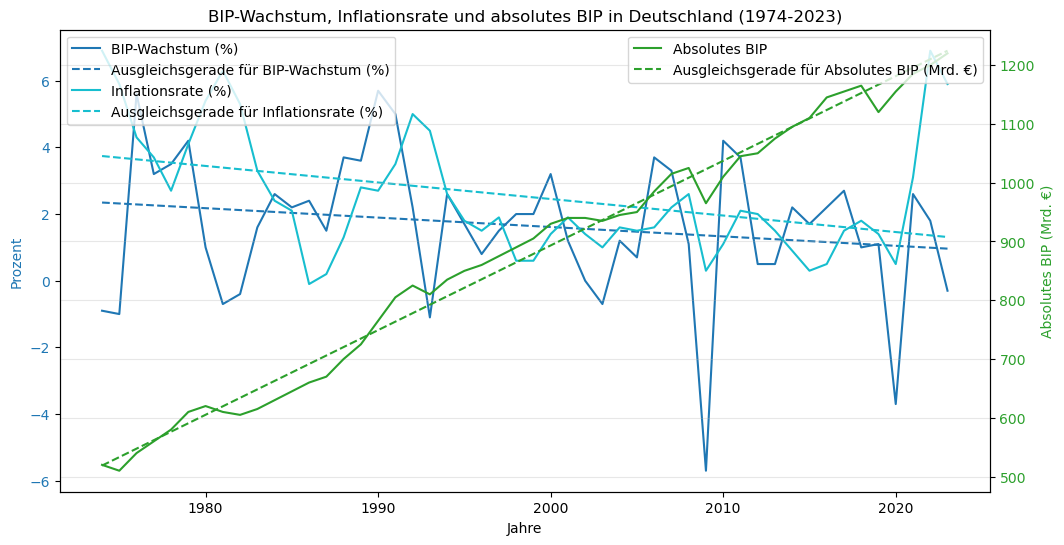

In [27]:
# Lineare Regressionen berechnen
### Ihr Code hier ###

# Plot
fig2, ax1 = plt.subplots(figsize=(12, 6))


# BIP-Wachstum und Inflationsrate
### Ihr code hier ###

b_bip, a_bip = np.polyfit(jahre, bip_wachstum, 1)

b_inf, a_inf = np.polyfit(jahre, inflationsrate, 1)

ax1.set_xlabel('Jahre')
ax1.set_ylabel('Prozent', color='tab:blue')
ax1.plot(jahre, bip_wachstum, label='BIP-Wachstum (%)', color='tab:blue')
ax1.plot(jahre, b_bip * jahre + a_bip, color = 'tab:blue', label='Ausgleichsgerade für BIP-Wachstum (%)', linestyle='--')
ax1.plot(jahre, inflationsrate, label='Inflationsrate (%)', color='tab:cyan')
ax1.plot(jahre, b_inf * jahre + a_inf, color = 'tab:cyan', label='Ausgleichsgerade für Inflationsrate (%)', linestyle='--')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')


# Absolutes BIP
### Ihr code hier ###

b_abs, a_abs = np.polyfit(jahre, absolutes_bip, 1)

ax2 = ax1.twinx()
ax2.set_ylabel('Absolutes BIP (Mrd. €)', color='tab:green')
ax2.plot(jahre, absolutes_bip, label='Absolutes BIP', color='tab:green')
ax2.plot(jahre, b_abs * jahre + a_abs, color = 'tab:green', label='Ausgleichsgerade für Absolutes BIP (Mrd. €)', linestyle='--')
ax2.tick_params(axis='y', labelcolor='tab:green')
ax2.legend(loc='upper right')


# Titel und Layout
plt.title('BIP-Wachstum, Inflationsrate und absolutes BIP in Deutschland (1974-2023)')
fig.tight_layout()
plt.grid(alpha=0.3)
plt.show()


Erreichte Punkte:  ___ / 2

---


### Augabe 4 
(1 Punkt)
##### Spezielle Relativitätstheroie - Zeitdiletation
Gegeben ist ein Datensatz mit relativen Geschwindigkeiten zu einem Bezugssystem. Ermitteln Sie die Zeitdillatation vom Objekt zu seinem Bezugssystem und stellen Sie die Ergebnisse in einem Balkendiagramm dar.

In [28]:
# Lichtgeschwindigkeit (m/s)
c = 299792458

# Zeitdilletationsfunktion als Lamdafunktion:
timedil = lambda v : 1 / np.sqrt(1-(v**2/c**2))

# Einige Geschwindigkeiten

kmh = np.zeros(6)

kmh[0] = 100     # Auto auf Autobahn
kmh[1] = 200     # Verrückte Leute auf deutschen Autobahnen
kmh[2] = 900     # Flugzeug
kmh[3] = 11300   # Satellit
kmh[4] = 107991  # Erde um die Sonne
kmh[5] = 828000  # Sonnensystem um die Milchstrasse

labels = ['auto','autobahn','flugzeug','satellit','erde','sonnensystem']

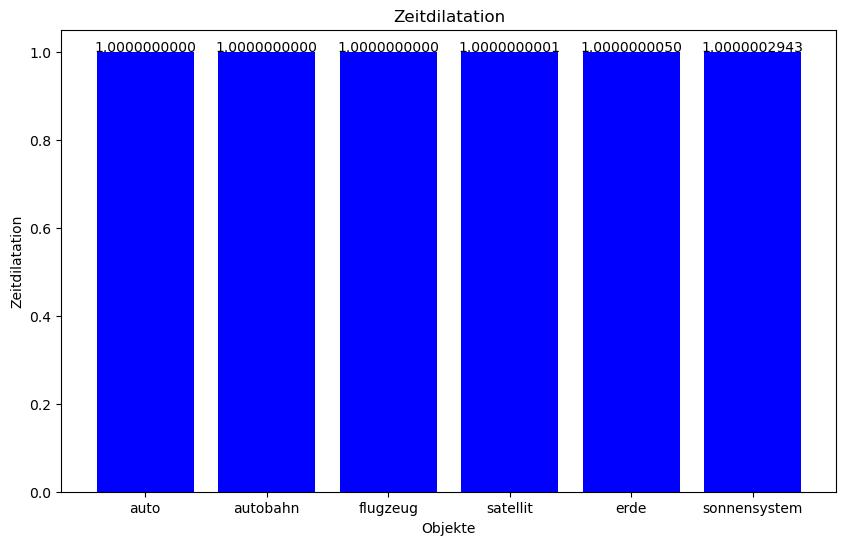

In [29]:
### Ihr code hier ###

dils = []
ms = kmh / 3.6

for speed in ms:
    dils.append(timedil(speed))

plt.figure(figsize=(10, 6))
plt.bar(labels, dils, color='blue')
plt.title('Zeitdilatation')
plt.xlabel('Objekte')
plt.ylabel('Zeitdilatation')

for i in range(len(dils)):
    dil = dils[i]
    plt.text(i, dil, f'{dil:.10f}', ha='center')

plt.show()

Erreichte Punkte:  ___ / 1

---


### Aufgabe 5 
(1 Punkte)
Plotten Sie ein Herz :)

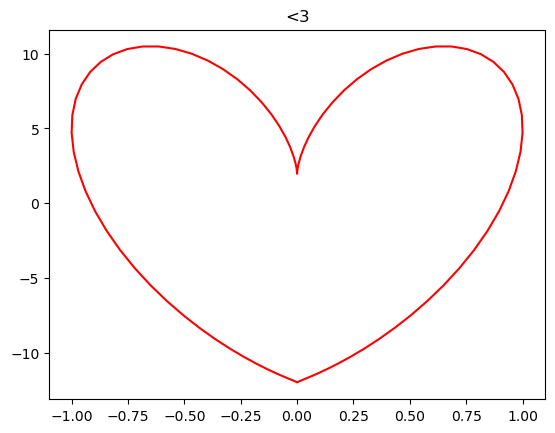

In [30]:
### Ihe codew hier ###
t = np.linspace(0, 2 * np.pi, 100)
x = np.sin(t)**3
y = 10 * np.cos(t) - 5 * np.cos(2 * t) - 3 * np.cos(3 * t)

plt.plot(x, y, color='red')
plt.title('<3')
plt.show()



Erreichte Punkte:  ___ / 1

---


**Gesamtpunktzahl:  ___ / 10**